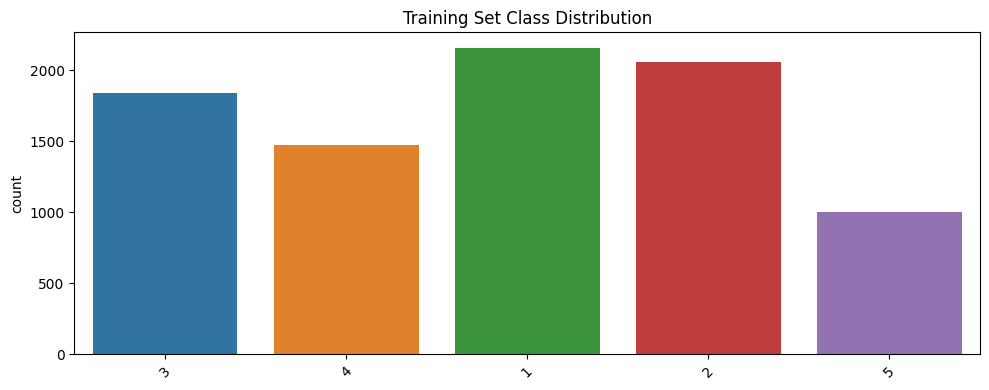

Applying targeted augmentation to balance classes...
Balanced dataset: {'3': 2159, '4': 2159, '1': 2159, '2': 2159, '5': 2159}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


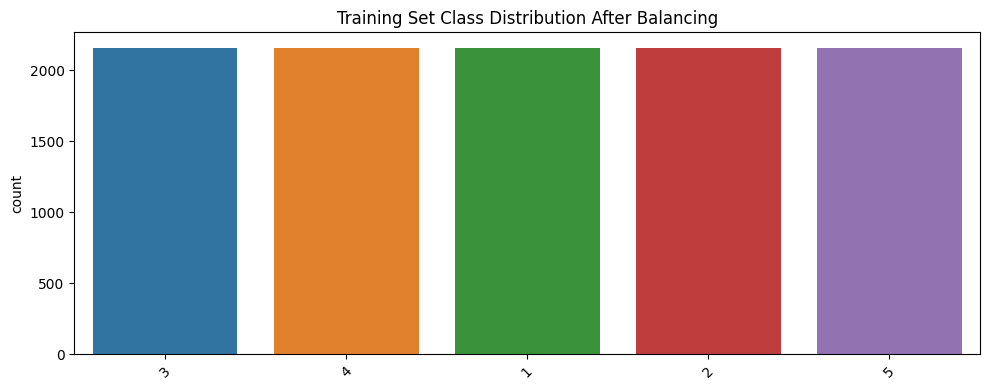

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-07 17:39:54.425596: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 198s 577ms/step - accuracy: 0.4002 - loss: 1.4031 - val_accuracy: 0.6707 - val_loss: 0.8001
Epoch 2/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 189s 559ms/step - accuracy: 0.6716 - loss: 0.8427 - val_accuracy: 0.6970 - val_loss: 0.7235
Epoch 3/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 181s 535ms/step - accuracy: 0.6951 - loss: 0.7520 - val_accuracy: 0.6923 - val_loss: 0.7010
Epoch 4/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 189s 559ms/step - accuracy: 0.7190 - loss: 0.7015 - val_accuracy: 0.7111 - val_loss: 0.6703
Epoch 5/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 201s 557ms/step - accuracy: 0.7245 - loss: 0.6766 - val_accuracy: 0.6989 - val_loss: 0.6830
Epoch 6/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 186s 549ms/step - accuracy: 0.7179 - loss: 0.6739 - val_accuracy: 0.7064 - val_loss: 0.6629
Epoch 7/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 186s 549ms/step - accuracy: 0.7235 - loss: 0.6564 - val_accuracy: 0.7064 - val_loss: 0.6670
Epoch 8/20
338/338 ━━━━━━━━━━━━━━━━━━━━ 202s 551ms/step - accuracy: 0.7152 -

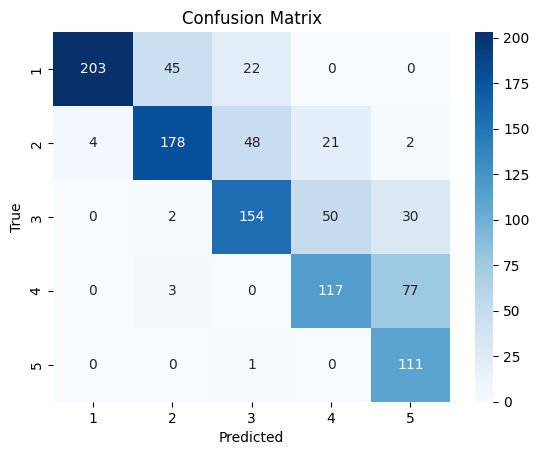

In [3]:
#  PCB Defect Detection using 3-layer CNN (with preprocessing, augmentation, training, and evaluation)

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import albumentations as A

# Paths
train_img_dir = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/train/images'
val_img_dir = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/images'
test_img_dir = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/test/images'

# Augmentation
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomGamma(p=0.3),
    A.MotionBlur(p=0.3)
])

IMG_SIZE = 128

def load_data_from_folder(folder):
    image_paths = glob(os.path.join(folder, '*.jpg'))
    images = []
    labels = []
    for path in image_paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
        label = path.split("_")[-2]  # extract label from filename
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

# Load Data
X_train, y_train = load_data_from_folder(train_img_dir)
X_val, y_val = load_data_from_folder(val_img_dir)
X_test, y_test = load_data_from_folder(test_img_dir)

# Show Class Distribution
plt.figure(figsize=(10, 4))
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Encode Labels
le = LabelEncoder()
y_train_enc = to_categorical(le.fit_transform(y_train))
y_val_enc = to_categorical(le.transform(y_val))
y_test_enc = to_categorical(le.transform(y_test))

#  Augment Minority Classes to Balance Dataset
def augment_minority_classes(X, y, augment, label_encoder):
    print("Applying targeted augmentation to balance classes...")

    y_str = y
    counts = Counter(y_str)
    max_count = max(counts.values())

    new_X, new_y = list(X), list(y_str)

    for label in counts:
        imgs = [x for x, l in zip(X, y_str) if l == label]
        needed = max_count - counts[label]
        for _ in range(needed):
            img = imgs[np.random.randint(len(imgs))]
            aug_img = augment(image=(img * 255).astype('uint8'))['image'] / 255.0
            new_X.append(aug_img)
            new_y.append(label)

    new_X = np.array(new_X)
    new_y_encoded = to_categorical(label_encoder.transform(new_y))

    print(f"Balanced dataset: {dict(Counter(new_y))}")
    return new_X, new_y_encoded, new_y

X_train_balanced, y_train_balanced, y_train_balanced_raw = augment_minority_classes(X_train, y_train, augment, le)
plt.figure(figsize=(10, 4))
sns.countplot(x=y_train_balanced_raw)
plt.title("Training Set Class Distribution After Balancing")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# CNN Model (3 Layers)
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn((IMG_SIZE, IMG_SIZE, 3), len(le.classes_))
model.summary()

# Training
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train_balanced, y_train_balanced,
          validation_data=(X_val, y_val_enc),
          epochs=20, batch_size=32,
          callbacks=[early_stop])

# Evaluation
preds = model.predict(X_test)
y_pred = np.argmax(preds, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
2025-05-14 03:57:53.959153: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747195074.263153      32 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747195074.350150      32 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a sp


--- Fold 1 ---
Augmenting minority classes...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-14 04:00:34.951712: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.4966 - loss: 0.2727 - val_accuracy: 0.1804 - val_loss: 0.5985 - learning_rate: 1.0000e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 265s 982ms/step - accuracy: 0.6116 - loss: 0.1176 - val_accuracy: 0.6684 - val_loss: 0.0909 - learning_rate: 1.0000e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.6416 - loss: 0.1017 - val_accuracy: 0.6977 - val_loss: 0.0675 - learning_rate: 1.0000e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 305s 975ms/step - accuracy: 0.6562 - loss: 0.0942 - val_accuracy: 0.7100 - val_loss: 0.0656 - learning_rate: 1.0000e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.6584 - loss: 0.0915 - val_accuracy: 0.7194 - val_loss: 0.0646 - learning_rate: 1.0000e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 266s 986ms/step - accuracy: 0.6735 - loss: 0.0860 - val_accuracy: 0.7194 - val_loss: 0.0649 - learning_rate: 1.0000e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 261s 968m

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 281s 1s/step - accuracy: 0.4834 - loss: 0.2763 - val_accuracy: 0.2185 - val_loss: 0.8786 - learning_rate: 1.0000e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.6117 - loss: 0.1141 - val_accuracy: 0.6737 - val_loss: 0.0772 - learning_rate: 1.0000e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.6296 - loss: 0.1044 - val_accuracy: 0.7012 - val_loss: 0.0701 - learning_rate: 1.0000e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.6402 - loss: 0.0957 - val_accuracy: 0.7042 - val_loss: 0.0671 - learning_rate: 1.0000e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 267s 988ms/step - accuracy: 0.6579 - loss: 0.0898 - val_accuracy: 0.7077 - val_loss: 0.0663 - learning_rate: 1.0000e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.6547 - loss: 0.0867 - val_accuracy: 0.7176 - val_loss: 0.0658 - learning_rate: 1.0000e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 239s 860ms/step - accuracy: 0.4955 - loss: 0.2774 - val_accuracy: 0.4306 - val_loss: 0.2570 - learning_rate: 1.0000e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 230s 852ms/step - accuracy: 0.6012 - loss: 0.1184 - val_accuracy: 0.7077 - val_loss: 0.0793 - learning_rate: 1.0000e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 239s 885ms/step - accuracy: 0.6158 - loss: 0.1064 - val_accuracy: 0.7194 - val_loss: 0.0710 - learning_rate: 1.0000e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 231s 855ms/step - accuracy: 0.6384 - loss: 0.0996 - val_accuracy: 0.7270 - val_loss: 0.0693 - learning_rate: 1.0000e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 231s 857ms/step - accuracy: 0.6547 - loss: 0.0929 - val_accuracy: 0.7094 - val_loss: 0.0710 - learning_rate: 1.0000e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 231s 857ms/step - accuracy: 0.6574 - loss: 0.0912 - val_accuracy: 0.7358 - val_loss: 0.0682 - learning_rate: 1.0000e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 247s 887ms/step - accuracy: 0.4939 - loss: 0.2682 - val_accuracy: 0.5296 - val_loss: 0.2209 - learning_rate: 1.0000e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 241s 890ms/step - accuracy: 0.6066 - loss: 0.1165 - val_accuracy: 0.6725 - val_loss: 0.0951 - learning_rate: 1.0000e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 257s 872ms/step - accuracy: 0.6132 - loss: 0.1057 - val_accuracy: 0.6837 - val_loss: 0.0742 - learning_rate: 1.0000e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 262s 874ms/step - accuracy: 0.6416 - loss: 0.0958 - val_accuracy: 0.6930 - val_loss: 0.0726 - learning_rate: 1.0000e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 236s 873ms/step - accuracy: 0.6460 - loss: 0.0921 - val_accuracy: 0.7071 - val_loss: 0.0707 - learning_rate: 1.0000e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 241s 892ms/step - accuracy: 0.6654 - loss: 0.0861 - val_accuracy: 0.7001 - val_loss: 0.0709 - learning_rate: 1.0000e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 233s 847ms/step - accuracy: 0.4969 - loss: 0.2506 - val_accuracy: 0.4555 - val_loss: 0.3847 - learning_rate: 1.0000e-04
Epoch 2/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 223s 825ms/step - accuracy: 0.6115 - loss: 0.1114 - val_accuracy: 0.6741 - val_loss: 0.0992 - learning_rate: 1.0000e-04
Epoch 3/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 250s 925ms/step - accuracy: 0.6348 - loss: 0.0984 - val_accuracy: 0.6887 - val_loss: 0.0735 - learning_rate: 1.0000e-04
Epoch 4/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 237s 876ms/step - accuracy: 0.6578 - loss: 0.0865 - val_accuracy: 0.6911 - val_loss: 0.0743 - learning_rate: 1.0000e-04
Epoch 5/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 239s 885ms/step - accuracy: 0.6761 - loss: 0.0846 - val_accuracy: 0.7063 - val_loss: 0.0728 - learning_rate: 1.0000e-04
Epoch 6/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 240s 891ms/step - accuracy: 0.6836 - loss: 0.0795 - val_accuracy: 0.6987 - val_loss: 0.0727 - learning_rate: 1.0000e-04
Epoch 7/20
270/270 ━━━━━━━━━━━━━━━━━━━━ 

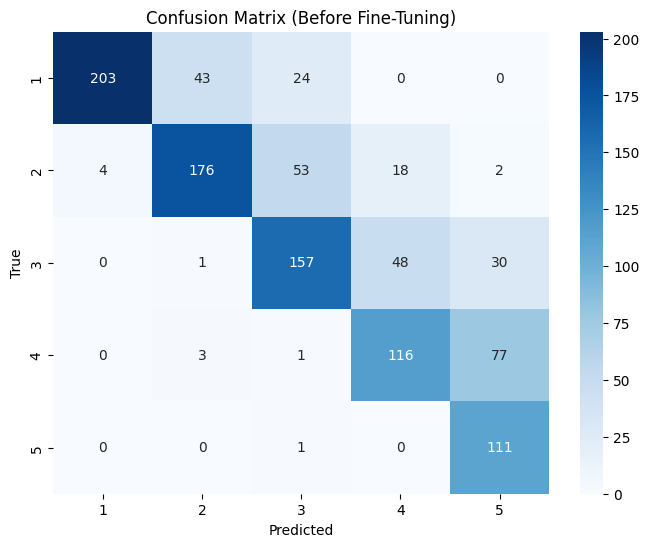

Confused pairs: [('1', '2'), ('1', '3'), ('2', '3'), ('2', '4'), ('3', '4'), ('3', '5'), ('4', '5')]


KeyError: 'val_accuracy'

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
import albumentations as A
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow.keras.backend as K

# Set seed
np.random.seed(42)
tf.random.set_seed(42)

# --- Paths ---
train_img_dir = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/train/images'
val_img_dir = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/val/images'
test_img_dir = '/kaggle/input/pcb-defect-dataset/pcb-defect-dataset/test/images'

# --- Parameters ---
IMG_SIZE = 128

# --- Augmentation ---
augment = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=20, p=0.5),
    A.RandomGamma(p=0.3),
    A.MotionBlur(p=0.3),
    A.OneOf([A.GaussNoise(), A.ImageCompression(), A.ChannelShuffle()], p=0.5),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.0, rotate_limit=0, p=0.5),
    A.CLAHE(p=0.2),
    A.GaussNoise(p=0.3),
    A.HueSaturationValue(p=0.3),
    A.GridDistortion(p=0.2)
])

# --- Load Data ---
def load_data(folder):
    paths = glob(os.path.join(folder, '*.jpg'))
    images, labels = [], []
    for p in paths:
        img = cv2.imread(p)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
        label = os.path.basename(p).split('_')[-2]  # like "image_001_open_1.jpg"
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

X_train, y_train = load_data(train_img_dir)
X_val, y_val = load_data(val_img_dir)
X_test, y_test = load_data(test_img_dir)

# --- Label Encode ---
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
y_test_cat = to_categorical(y_test_enc)

# --- Focal Loss ---
def focal_loss(gamma=2.0, alpha=0.25):
    def loss_fn(y_true, y_pred):
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.keras.backend.clip(y_pred, epsilon, 1.0 - epsilon)
        cross_entropy = -y_true * tf.keras.backend.log(y_pred)
        weight = alpha * y_true * tf.pow(1 - y_pred, gamma)
        return tf.reduce_mean(tf.reduce_sum(weight * cross_entropy, axis=1))
    return loss_fn

# --- CNN Model ---
def build_cnn(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(1e-4), loss=focal_loss(), metrics=['accuracy'])
    return model

# --- Augment Minorities ---
def augment_minority_classes(X, y, augment_fn, label_encoder):
    print("Augmenting minority classes...")
    counts = Counter(y)
    max_count = max(counts.values())
    new_X, new_y = list(X), list(y)
    for label in counts:
        imgs = [x for x, l in zip(X, y) if l == label]
        for _ in range(max_count - counts[label]):
            img = imgs[np.random.randint(len(imgs))]
            aug_img = augment_fn(image=(img * 255).astype('uint8'))['image'] / 255.0
            new_X.append(aug_img)
            new_y.append(label)
    return np.array(new_X), to_categorical(label_encoder.transform(new_y))

# --- K-Fold Training ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
models = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train_enc)):
    print(f"\n--- Fold {fold+1} ---")
    X_tr, X_vl = X_train[train_idx], X_train[val_idx]
    y_tr, y_vl = y_train[train_idx], y_train[val_idx]

    X_tr_aug, y_tr_aug = augment_minority_classes(X_tr, y_tr, augment, le)
    y_val_cat = to_categorical(le.transform(y_vl))

    model = build_cnn((IMG_SIZE, IMG_SIZE, 3), len(le.classes_))
    es = EarlyStopping(patience=5, restore_best_weights=True)
    rlrop = ReduceLROnPlateau(patience=3, factor=0.5)

    model.fit(X_tr_aug, y_tr_aug, validation_data=(X_vl, y_val_cat),
              epochs=20, batch_size=32, callbacks=[es, rlrop], verbose=1)
    
    models.append(model)

# --- Ensemble Prediction ---
print("\n--- Ensembling ---")
ensemble_preds = np.zeros((len(X_test), len(le.classes_)))
for m in models:
    ensemble_preds += m.predict(X_test, verbose=0) / len(models)

y_pred_ensemble = np.argmax(ensemble_preds, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred_ensemble)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix (Before Fine-Tuning)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- Identify Confused Classes ---
confusion_pairs = []
for i in range(len(cm)):
    for j in range(len(cm)):
        if i != j and cm[i][j] > 10:
            confusion_pairs.append((i, j))
print("Confused pairs:", [(le.classes_[i], le.classes_[j]) for i, j in confusion_pairs])

# --- Fine-tune on Confused ---
def fine_tune_confused(model, X, y, pairs, le, augment_fn):
    print("Fine-tuning on confused pairs...")
    target_labels = {i for pair in pairs for i in pair}
    idx = [i for i, label in enumerate(y) if le.transform([label])[0] in target_labels]
    X_conf = X[idx]
    y_conf = y[idx]
    X_aug, y_aug = augment_minority_classes(X_conf, y_conf, augment_fn, le)
    model.fit(X_aug, y_aug, epochs=5, batch_size=32, verbose=1)
    return model

best_model_idx = np.argmax([max(m.history.history['val_accuracy']) for m in models])
best_model = models[best_model_idx]
fine_tune_confused(best_model, X_train, y_train, confusion_pairs, le, augment)

# --- Final Evaluation ---
final_preds = best_model.predict(X_test, verbose=0)
y_pred_final = np.argmax(final_preds, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_final, target_names=le.classes_))

# --- ROC Curve ---
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], final_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve by Class (Fine-Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


Fine-tuning on confused pairs...
Augmenting minority classes...
Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 275s 813ms/step - accuracy: 0.6773 - loss: 0.0864
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 260s 770ms/step - accuracy: 0.6896 - loss: 0.0806
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 272s 803ms/step - accuracy: 0.6870 - loss: 0.0782
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 263s 779ms/step - accuracy: 0.6920 - loss: 0.0754
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 321s 778ms/step - accuracy: 0.6982 - loss: 0.0721

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.75      0.85       270
           2       0.77      0.67      0.72       253
           3       0.63      0.61      0.62       236
           4       0.62      0.59      0.61       197
           5       0.50      0.99      0.67       112

    accuracy                           0.70      1068
   macro avg       0.70      0.72      0.69      1068
weighted avg       0.74      0.70

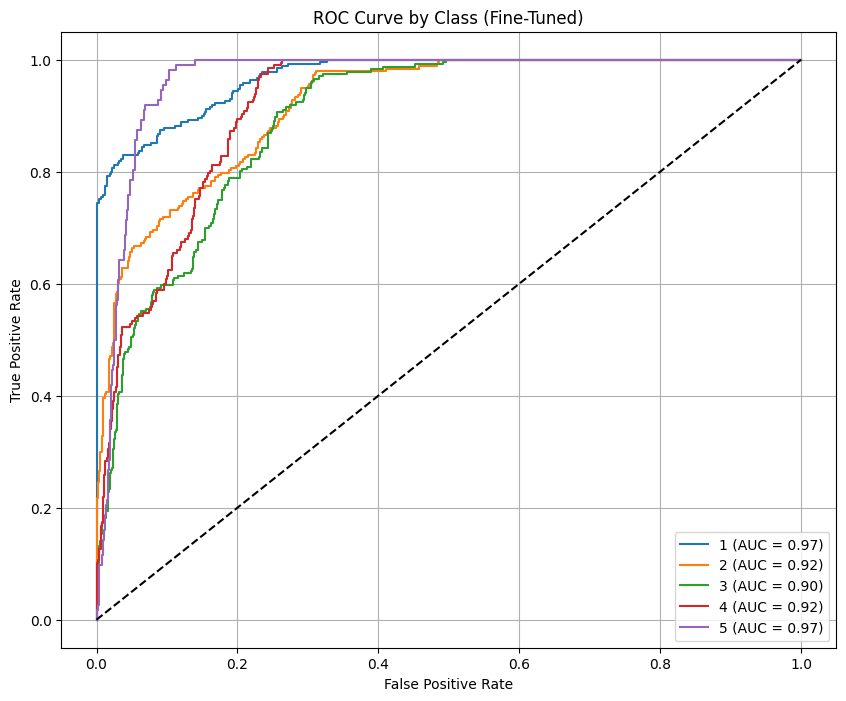

In [2]:
best_model = models[-1] 

# Continue fine-tuning
fine_tuned_model = fine_tune_confused(best_model, X_train, y_train, confusion_pairs, le, augment)

# --- Final Evaluation ---
final_preds = fine_tuned_model.predict(X_test, verbose=0)
y_pred_final = np.argmax(final_preds, axis=1)

print("\nClassification Report:")
print(classification_report(y_true, y_pred_final, target_names=le.classes_))

# --- ROC Curve ---
plt.figure(figsize=(10, 8))
for i in range(len(le.classes_)):
    fpr, tpr, _ = roc_curve(y_test_cat[:, i], final_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{le.classes_[i]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve by Class (Fine-Tuned)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
